In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [6]:
iris_dataset = datasets.load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris_features = iris_dataset.data
iris_features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Kết quả phân loại cần đạt

0, 1, 2 tương ứng với 3 lớp dữ liệu (3 loài hoa lan)

In [8]:
iris_target = iris_dataset.target
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Đặc trưng của loài thứ nhất (class 0)

In [9]:
iris_type0_features = iris_features[iris_target == 0]
iris_type0_features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Đặc trưng của loài thứ hai (class 1)

In [10]:
iris_type1_features = iris_features[iris_target == 1]
iris_type1_features

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

# Đặc trưng của loài thứ ba (class 2)

In [11]:
iris_type2_features = iris_features[iris_target == 2]
iris_type2_features

array([[6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.5, 4.5, 1.7],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2

# Viết hàm class display để thể hiện mối quan hệ giữa đặc trưng và nhãn (loài hoa)

In [13]:
def classes_display(data, label):
    K = np.amax(label) + 1
    C0 = data[label == 0]
    C1 = data[label == 1]
    C2 = data[label == 2]

    plt.plot(C0[:, 0], C0[:, 1], "^", markersize = 4, alpha = .8)
    plt.plot(C1[:, 0], C1[:, 1], "o", markersize = 4, alpha = .8)
    plt.plot(C2[:, 0], C2[:, 1], "s", markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

# Sử dụng hàm ở mục trước để in ra mối quan hệ giữa từng cập đặc trưng

Relationship between feature 0 and feature 1


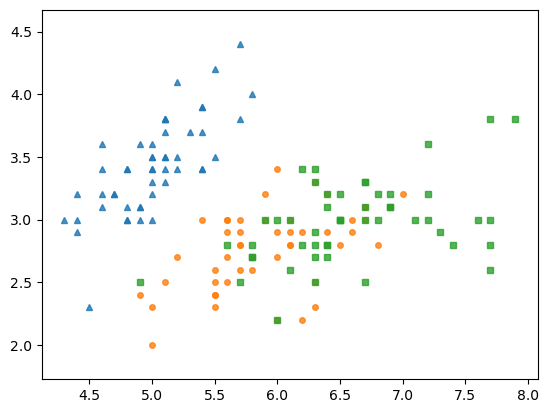

In [14]:
print("Relationship between feature 0 and feature 1")
features_0_1 = iris_features[:, [0, 1]]
classes_display(features_0_1, iris_target)

Relationship between feature 0 and feature 2


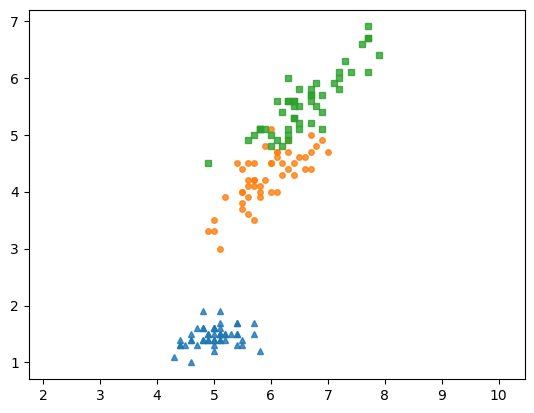

In [15]:
print("Relationship between feature 0 and feature 2")
features_0_2 = iris_features[:, [0, 2]]
classes_display(features_0_2, iris_target)

Relationship between feature 0 and feature 3


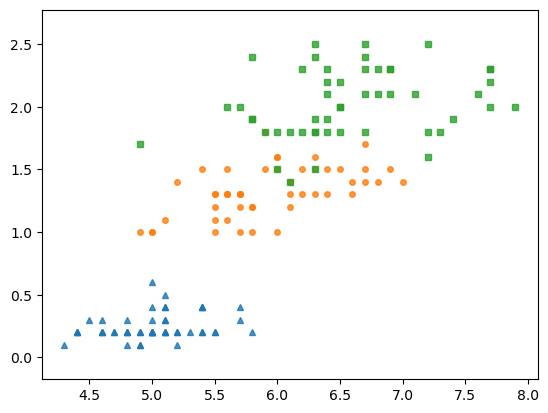

In [16]:
print("Relationship between feature 0 and feature 3")
features_0_3 = iris_features[:, [0, 3]]
classes_display(features_0_3, iris_target)

Relationship between feature 1 and feature 0


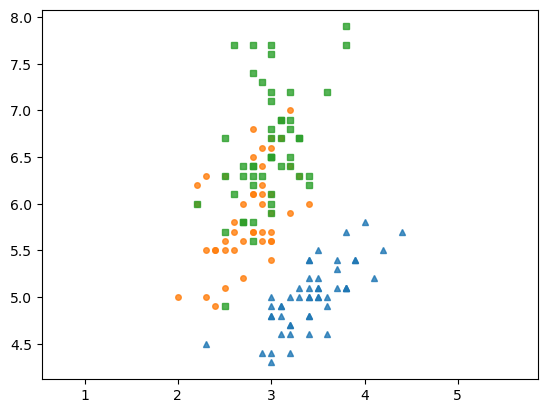

In [17]:
print("Relationship between feature 1 and feature 0")
features_1_0 = iris_features[:, [1, 0]]
classes_display(features_1_0, iris_target)

Relationship between feature 1 and feature 2


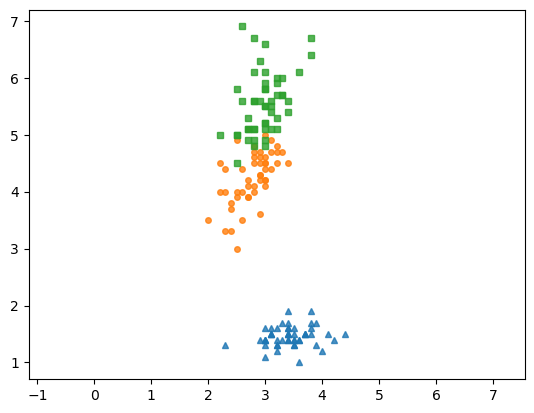

In [18]:
print("Relationship between feature 1 and feature 2")
features_1_2 = iris_features[:, [1, 2]]
classes_display(features_1_2, iris_target)

Relationship between feature 1 and feature 3


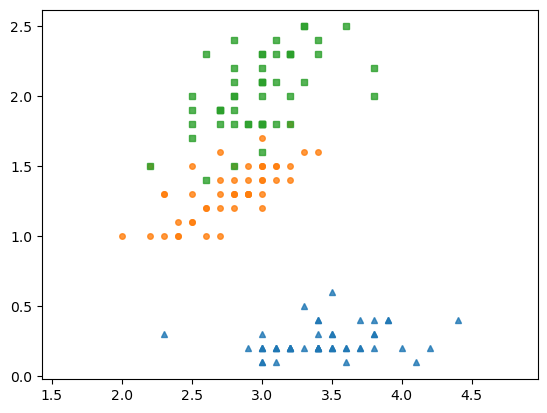

In [19]:
print("Relationship between feature 1 and feature 3")
features_1_3 = iris_features[:, [1, 3]]
classes_display(features_1_3, iris_target)

Relationship between feature 2 and feature 0


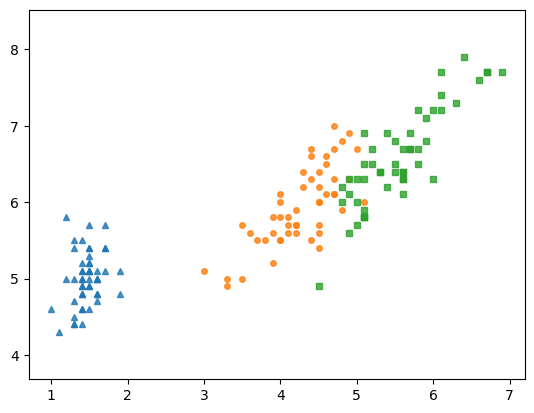

In [20]:
print("Relationship between feature 2 and feature 0")
features_2_0 = iris_features[:, [2, 0]]
classes_display(features_2_0, iris_target)

Relationship between feature 2 and feature 1


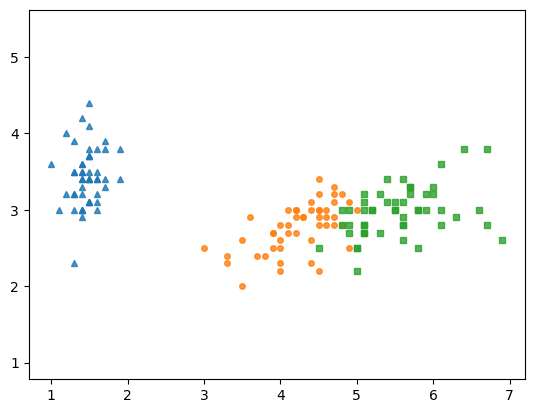

In [21]:
print("Relationship between feature 2 and feature 1")
features_2_1 = iris_features[:, [2, 1]]
classes_display(features_2_1, iris_target)

Relationship between feature 2 and feature 3


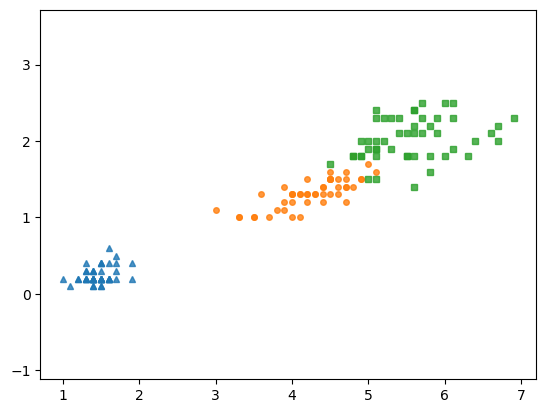

In [22]:
print("Relationship between feature 2 and feature 3")
features_2_3 = iris_features[:, [2, 3]]
classes_display(features_2_3, iris_target)

Relationship between feature 3 and feature 0


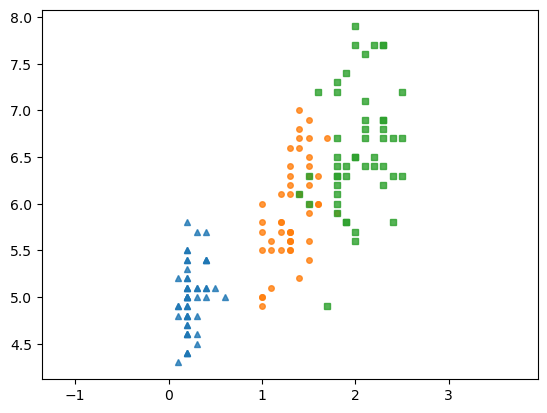

In [23]:
print("Relationship between feature 3 and feature 0")
features_3_0 = iris_features[:, [3, 0]]
classes_display(features_3_0, iris_target)

Relationship between feature 3 and feature 1


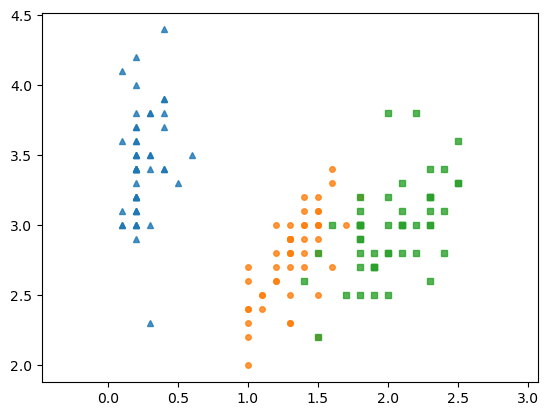

In [24]:
print("Relationship between feature 3 and feature 1")
features_3_1 = iris_features[:, [3, 1]]
classes_display(features_3_1, iris_target)

Relationship between feature 3 and feature 2


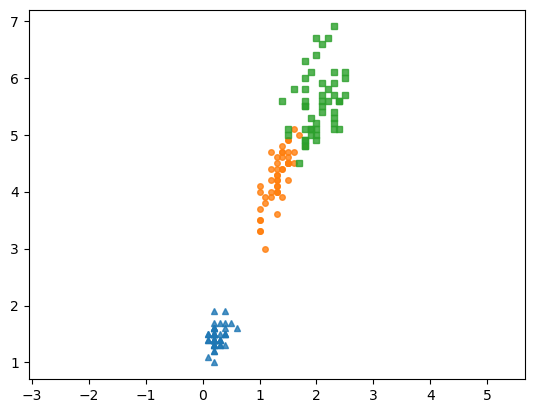

In [25]:
print("Relationship between feature 3 and feature 2")
features_3_2 = iris_features[:, [3, 2]]
classes_display(features_3_2, iris_target)

# Chia tập dữ liệu 150 dòng thành 100 dòng huấn luyện và 50 dòng để kiểm tra

In [26]:
train_features, test_features, train_target, test_target = train_test_split(iris_features, iris_target, test_size = 50)

In [27]:
print("Training features size: ", train_features.shape)
print("Training target size: ", train_target.shape)

Training features size:  (100, 4)
Training target size:  (100,)


In [28]:
print("Testing features size: ", test_features.shape)
print("Testing target size: ", test_target.shape)

Testing features size:  (50, 4)
Testing target size:  (50,)


In [29]:
print("Training features: ")
print(train_features)

Training features: 
[[6.4 2.8 5.6 2.2]
 [5.7 3.  4.2 1.2]
 [5.8 2.7 3.9 1.2]
 [5.6 2.7 4.2 1.3]
 [7.2 3.2 6.  1.8]
 [6.4 2.7 5.3 1.9]
 [6.6 2.9 4.6 1.3]
 [5.7 2.8 4.1 1.3]
 [5.8 2.7 4.1 1. ]
 [6.5 3.  5.8 2.2]
 [5.8 2.6 4.  1.2]
 [4.4 3.2 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.4 3.7 1.5 0.2]
 [5.1 3.7 1.5 0.4]
 [5.  2.3 3.3 1. ]
 [5.2 3.5 1.5 0.2]
 [5.4 3.4 1.5 0.4]
 [4.8 3.4 1.6 0.2]
 [6.7 3.1 4.4 1.4]
 [5.6 2.8 4.9 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]
 [5.3 3.7 1.5 0.2]
 [4.9 3.  1.4 0.2]
 [5.  3.5 1.6 0.6]
 [4.9 3.6 1.4 0.1]
 [5.7 3.8 1.7 0.3]
 [6.  3.  4.8 1.8]
 [6.9 3.1 4.9 1.5]
 [5.  2.  3.5 1. ]
 [5.5 2.4 3.7 1. ]
 [5.9 3.2 4.8 1.8]
 [5.8 2.8 5.1 2.4]
 [6.5 3.  5.5 1.8]
 [6.4 2.9 4.3 1.3]
 [5.5 2.4 3.8 1.1]
 [7.2 3.6 6.1 2.5]
 [6.1 3.  4.6 1.4]
 [5.  3.6 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [6.2 2.2 4.5 1.5]
 [7.  3.2 4.7 1.4]
 [6.7 3.1 4.7 1.5]
 [5.  3.  1.6 0.2]
 [7.2 3.  5.8 1.6]
 [6.  2.7 5.1 1.6]
 [5.7 2.6 3.5 1. ]
 [6.3 2.9 5.6 1.8]
 [6.  3.4 4.5 1.6]
 [5.  3.4 1.5 0.2]
 [7.3 2.9 6

In [30]:
print("Testing target: ")
print(test_target)

Testing target: 
[1 2 0 0 1 1 2 0 1 0 2 2 1 2 0 2 1 2 2 2 0 1 0 0 1 1 1 0 2 1 0 2 0 2 2 0 1
 0 1 2 2 2 2 2 2 2 2 2 2 0]


# Huấn luyện mô hình phân loại sử dụng thuật toán 1NN (1 láng giềng):

In [32]:
classifier_1NN = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
classifier_1NN.fit(train_features, train_target)
classifier_1NN

KNeighborsClassifier(n_neighbors=1)

In [33]:
predictions = classifier_1NN.predict(test_features)
print("Prediction results of kNN with K=1: ")
print("Target labels: ", test_target)
print("Predicted labels: ", predictions)

Prediction results of kNN with K=1: 
Target labels:  [1 2 0 0 1 1 2 0 1 0 2 2 1 2 0 2 1 2 2 2 0 1 0 0 1 1 1 0 2 1 0 2 0 2 2 0 1
 0 1 2 2 2 2 2 2 2 2 2 2 0]
Predicted labels:  [1 2 0 0 1 1 2 0 1 0 2 1 1 2 0 2 1 2 1 2 0 1 0 0 1 1 1 0 2 1 0 2 0 2 2 0 1
 0 1 2 2 2 2 2 2 2 2 2 1 0]


# Độ chính xác của thuật toán 1NN (1 láng giềng)

In [34]:
accuracy = 100 * accuracy_score(test_target, predictions)
print("Accuracy of kNN with K=1: ", accuracy, "%")

Accuracy of kNN with K=1:  94.0 %


In [35]:
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.81      1.00      0.90        13
           2       1.00      0.87      0.93        23

    accuracy                           0.94        50
   macro avg       0.94      0.96      0.94        50
weighted avg       0.95      0.94      0.94        50


# Huấn luyện mô hình phân loại mới sử dụng thuật toán 2NN (2 láng giềng)

In [36]:
classifier_2NN = neighbors.KNeighborsClassifier(n_neighbors = 2, p = 2)
classifier_2NN.fit(train_features, train_target)
classifier_2NN

KNeighborsClassifier(n_neighbors=2)

In [37]:
predictions = classifier_2NN.predict(test_features)
print("Prediction results of kNN with K=2: ")
print("Target labels: ", test_target)
print("Predicted labels: ", predictions)

Prediction results of kNN with K=2: 
Target labels:  [1 2 0 0 1 1 2 0 1 0 2 2 1 2 0 2 1 2 2 2 0 1 0 0 1 1 1 0 2 1 0 2 0 2 2 0 1
 0 1 2 2 2 2 2 2 2 2 2 2 0]
Predicted labels:  [1 2 0 0 1 1 2 0 1 0 2 1 1 2 0 2 1 2 1 2 0 1 0 0 1 1 1 0 2 1 0 2 0 2 2 0 1
 0 1 2 2 2 2 2 2 1 2 2 1 0]


In [39]:
accuracy = 100 * accuracy_score(test_target, predictions)
print("Accuracy of kNN with K=2: ", accuracy, "%")

Accuracy of kNN with K=2:  92.0 %


In [40]:
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.76      1.00      0.87        13
           2       1.00      0.83      0.90        23

    accuracy                           0.92        50
   macro avg       0.92      0.94      0.92        50
weighted avg       0.94      0.92      0.92        50


# Huấn luyện mô hình phân loại mới sử dụng thuật toán 10NN (10 láng giềng)

In [41]:
classifier_10NN = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
classifier_10NN.fit(train_features, train_target)
classifier_10NN

KNeighborsClassifier(n_neighbors=10)

In [44]:
predictions_10NN = classifier_10NN.predict(test_features)
print("Prediction results of kNN with K=10: ")
print("Target labels: ", test_target)
print("Predicted labels: ", predictions)

Prediction results of kNN with K=10: 
Target labels:  [1 2 0 0 1 1 2 0 1 0 2 2 1 2 0 2 1 2 2 2 0 1 0 0 1 1 1 0 2 1 0 2 0 2 2 0 1
 0 1 2 2 2 2 2 2 2 2 2 2 0]
Predicted labels:  [1 2 0 0 1 1 2 0 1 0 2 1 1 1 0 2 1 2 1 2 0 1 0 0 1 1 1 0 2 1 0 2 0 2 2 0 1
 0 1 2 2 2 2 2 2 2 2 2 1 0]


In [45]:
accuracy = 100 * accuracy_score(test_target, predictions_10NN)
print("Accuracy of kNN with K=10: ", accuracy, "%")

Accuracy of kNN with K=10:  92.0 %
